In [26]:
import os
os.chdir('..')

In [129]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

from scipy.stats import linregress

import Yukawa_SINDy as ys
import cross_validation as cv

from importlib import reload
import pickle as pkl
with open('scaling_const.float', 'rb') as f:
    SCALING_CONST = pkl.load(f)

In [67]:
scatter_kwargs = {}
scatter_kwargs["facecolors"] = 'none'
scatter_kwargs["edgecolors"] = 'tab:blue'

In [130]:
def generate_threshold_subplots(thresholds: list, max_coef_dev=None):
    # convert thresholds to ndarray
    if not isinstance(thresholds, np.ndarray):
        print('foo')
        thresholds = np.array(thresholds)
        print(thresholds.shape)

    ncols = 2
    nrows = np.ceil(thresholds.shape[0]/2).astype(int)

    # pad thresholds if not divisible by ncols, then reshape
    if len(thresholds) != ncols*nrows:
        pad = len(thresholds) % ncols
        thresholds = np.pad(thresholds, (0,pad))
    thresholds = thresholds.reshape((nrows, ncols))
    
    # create subplots
    fig, axs = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            ax = axs[row, col]
            thresh = thresholds[row, col]
            ax = plot_error_vs_dev(thresh, max_coef_dev, ax)
    
    # label axes
    fig.supxlabel("$\Delta c$")
    fig.supylabel("$\epsilon$")
    fig.tight_layout()
    return fig, axs


def load_data(threshold: float):
    # load data
    threshold_str = f'{threshold:.2f}'.replace('.', '_')
    directory_prefix = f'paper_results/prediction_vs_coef_deviation/threshold_'
    directory_name = directory_prefix + threshold_str
    data = []
    file_names = [
        'coefficient_devs.pickle',
        'prediction_errors.pickle'
    ]

    for file_name in file_names:
        data.append(ys.unpickle_data(directory_name,file_name))
    
    # unpack from list to readable vars
    coef_devs   = data[0]
    pred_errors = data[1]

    return coef_devs, pred_errors


def plot_error_vs_dev(threshold: float, max_coef_dev = None, ax: Axes = None):
    
    if ax is None:
        _, ax = plt.subplots()
        # labels
        ax.set_xlabel("$\Delta c$")
        ax.set_ylabel("$\epsilon$")

    coef_devs, pred_errors = load_data(threshold)

    # plot
    ax.scatter(coef_devs, pred_errors, **scatter_kwargs)

    ax.set_title(f'Threshold = {threshold:.2f}')
    if max_coef_dev is not None:
        ax.set_xlim((0,max_coef_dev))

    return ax

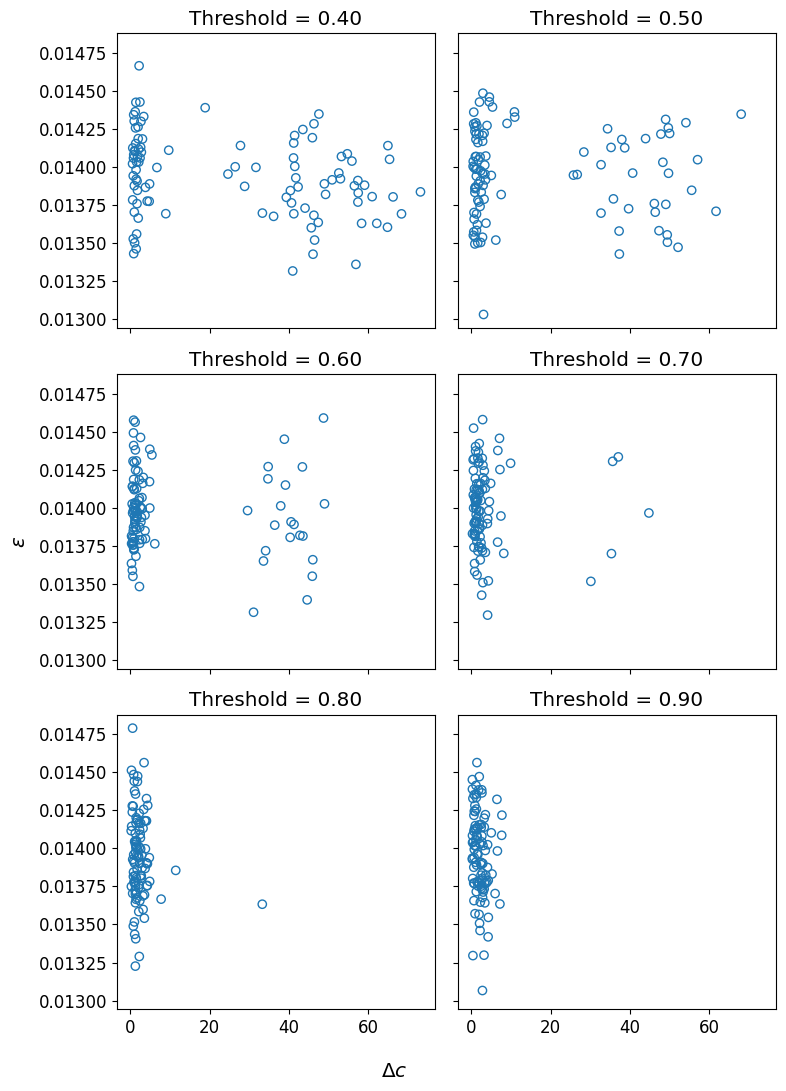

In [131]:
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,11)
thresholds = np.arange(0.4, 1.0, 0.1)
fig, ax = generate_threshold_subplots(thresholds)
# ax.set_xlim((0,6))

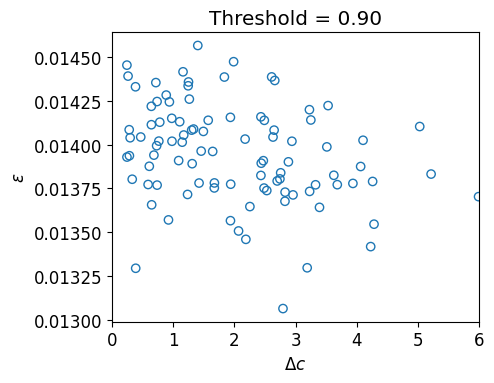

In [139]:
plt.rcParams["figure.figsize"] = (5,4)
plt.rcParams["font.size"] = 12
fig, ax = plt.subplots()
ax = plot_error_vs_dev(
    threshold = 0.9,
    ax = ax
)
ax.set_xlim((0,6))
ax.set_xlabel("$\Delta c$")
ax.set_ylabel("$\epsilon$")
fig.tight_layout()

In [138]:
coef_devs, pred_error = load_data(threshold=0.9)
result = linregress(coef_devs, pred_error)
print(f"Slope: {result.slope:.2e}")
print(f"Intercept: {result.intercept:.4f}")
print(f"R^2 value: {result.slope*result.slope:.2e}")


Slope: -2.99e-05
Intercept: 0.0140
R^2 value: 8.94e-10
